# Q-learning using only numpy
- 계속 보기

In [1]:
import numpy as np
import random
from IPython.display import Image

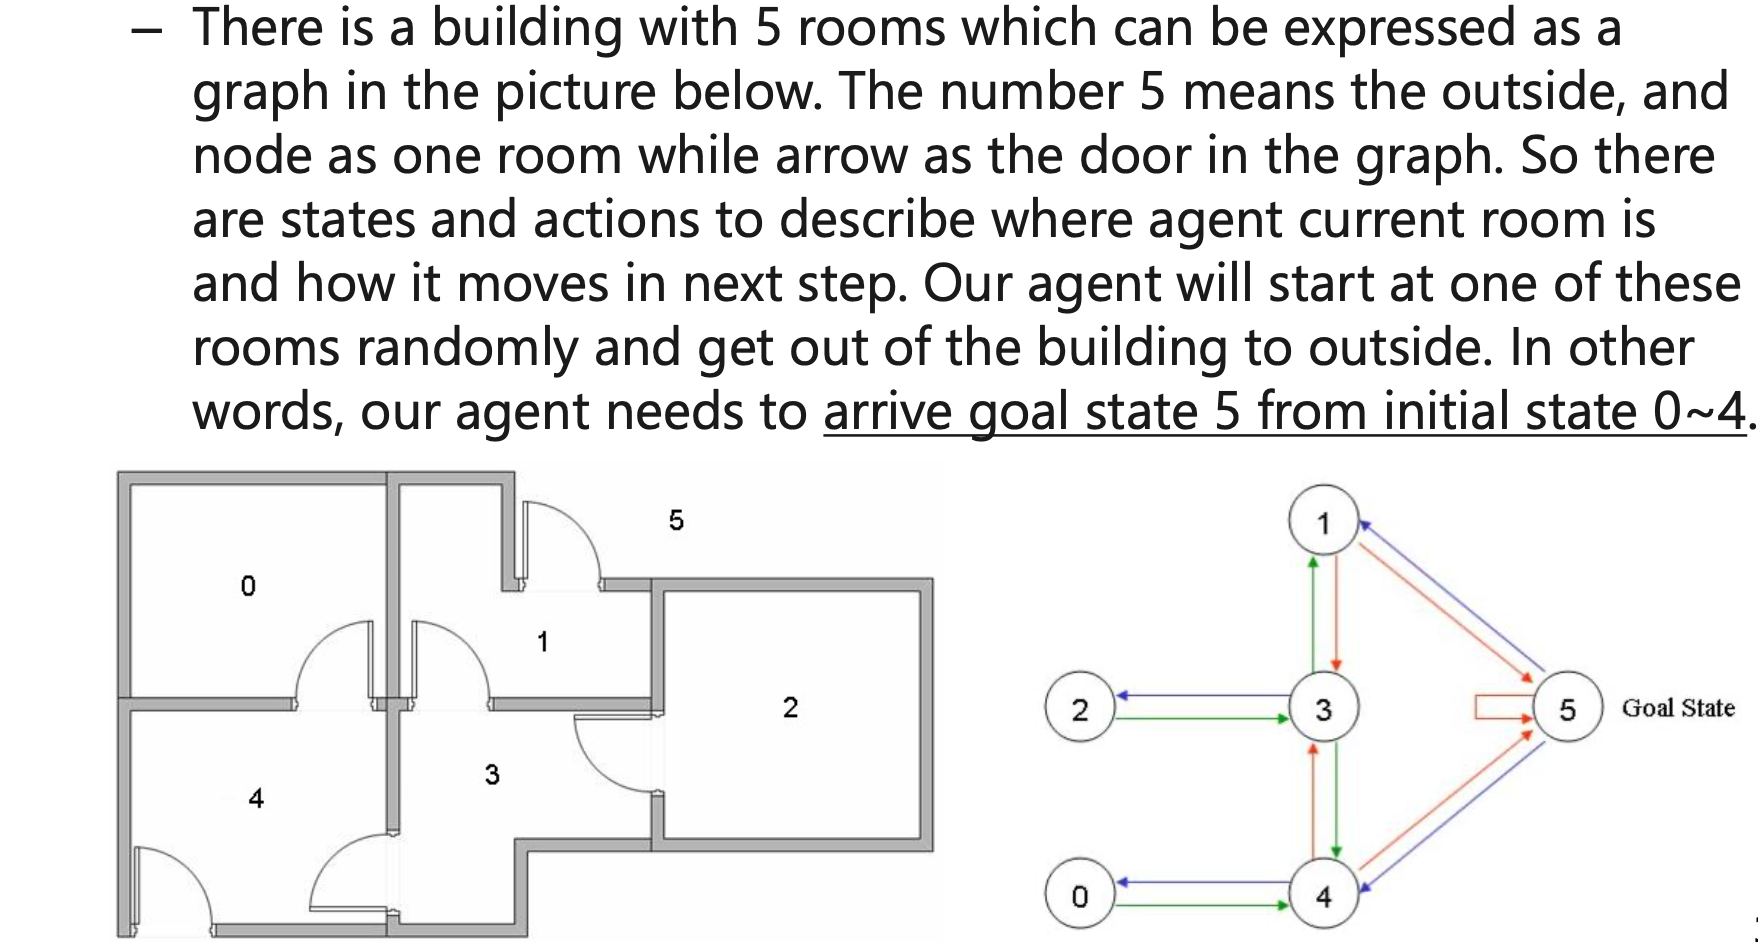

In [2]:
Image('/Users/younghun/Desktop/gitrepo/data/example_RL.png')

- State : 6종류
- Action : 6종류
- array는 행:state, 열:Action으로 구성
<br><br>
- R : 각 state에서 각 Action을 취할 때 얻게 되는 table(array)
- Q : 각 state에서 어떤 action을 취해야 목표 지점에 가장 빨리 도착하는지 정보를 갖고 있는 Q-table

In [2]:
# 각 State에서 각 Action을 취할 때 얻게 되는 'R' array
R = np.array([[-1,-1,-1,-1, 0, -1],
              [-1,-1,-1, 0,-1,100],
              [-1,-1,-1, 0,-1, -1],
              [-1, 0, 0,-1, 0, -1],
              [ 0,-1,-1, 0,-1,100],
              [-1, 0,-1,-1, 0,100]])

# 최적의 길을 찾아가도록 나타내는 'Q-table' array(R과 사이즈 동일)
Q = np.zeros((6,6))

In [14]:
# discount factor
gamma = 0.8

# episode : 최적의 길을 찾아보도록 하는 1번의 시도
for episode in range(0,50): #50번 시도
    # 어디 위치에서 시작할지 모르니 초기 상태는 매번 랜덤값으로 부여
    initial_state = random.randint(0,5) # 상태가 5종류니까!
    current_state = initial_state
    # 처음 상태가 목표 상태(5)일 때는 길을 찾아다니지 않고 가민히 있도록 하기위한 변수
    flag = 0
    
    # 처음 상태가 목표 상태(5)일 때는 최적의 길 찾아가는 while문 돌지마!
    while flag == 0 or current_state != 5:
        flag = 1
        # 현재 상태 -> 다음 상태로 갈 때의 {'다음상태':'다음상태로 갔을 때의 보상'} 을 담는 dict
        # 다음 상태 -> 다다음 상태로 갈 때의 {'다다음상태':'다다음상태로 갔을 때의 보상'}을 담는 dict
        current_state_aggregate = {}
        next_state_aggregate = {}
        '''
        - index : 랜덤으로 정해진 초기상태일 때 행동할 수 있는 Action 종류 (Ex. 1이면 1 state로 가는 action을 의미)
        - value : index(행동)을 하게 되면 주어지는 보상
        '''
        for index, value in enumerate(R[current_state]):
            # 현재 상태에서 갈 수 있는(-1이 아닐때) state를 current dict의 key에,
            # 그 갈 수 있는 state로 이동함으로써 얻게 되는 보상을 current dict의 value로 집어넣기
            if value != -1:
                current_state_aggregate[index] = value
        # 위에서 current dict의 key에 담긴 값들 즉, 초기상태에서 다음으로 갈 수 있는 state 종류들 중 랜덤하게 뽑아서 이동
        next_state = random.choice(list(current_state_aggregate.keys()))
        # 업데이트된 다음 state에서 갈 수 있는 곳 보기 위해 R(보상) array 참조
        for index_, value_ in enumerate(R[next_state]):
            # 다음 state로 갈 수 있는 곳들 key, value로 next dict에 담기
            if value_ != -1:
                next_state_aggregate[index_] = value_
                
        ### Q-table에 정보입력 ###
        '''
        공식 : Q(s,a) = reward + max(Q(s', a')) 사용
        - reward : s -> s'로 a행동 취한 후 얻는 보상
        - max(Q(s',a')) : s'에서 a'행동취한 후 '어떤 상태'로 이동한 후 얻는 보상값들 중 가장 큰 값!
        '''
        Q[current_state, next_state] = R[current_state, next_state] + gamma*max(Q[next_state, list(next_state_aggregate.keys())])
        # 그리고 다음 state를 현재 state로 업데이트해서 while문 반복
        current_state = next_state
# Q-table 출력해서 목표에 도달하는 루트 보기
print(Q.astype('int32'))

[[  0   0   0   0 284   0]
 [  0   0   0 227   0 355]
 [  0   0   0 227   0   0]
 [  0 284 181   0 284   0]
 [227   0   0 227   0 355]
 [  0 255   0   0 217 319]]


In [13]:
# array에서 안에 리스트 추가해서 여러값 불러올 수 있음!
max(R[1, [0,1,2]])

-1

# Frozen lake example using GYM library

## 계속 똑같은 행동만 취하는 것이 문제점 Case

In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import random

Final Q-table
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Success Rate:  0.0


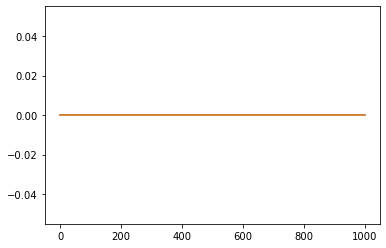

In [64]:
# Frozen lake 게임의 World(Environment) 불러오기
# 여기서 World란, 위 예시의 R array처럼 각 state와 각 action에 대한 보상이 정해져 있는 Environment를 뜻함
env = gym.make('FrozenLake-v0')

# World의 사이즈와 동일한 Q-table 생성(행:state, 열:action)
Q = np.zeros((env.observation_space.n, env.action_space.n))

# num of episodes : 몇 번 최적의 길을 찾도록 시도할 것인지
num_episodes = 1000
# 각 episode에 대한 reward 담을 리스트 생성
rList = []
successRate = []

# 한번 목표에 도착하는 루트를 찾는 것을 여러번 시도하자!
for episode in range(num_episodes):
    # 초기 상태(0 상태로) 초기화
    state = env.reset()
    total_reward = 0
    done = False
    
    # 주어진 초기 상태로 길을 찾아나서자!(목표상태에 도착할 때까지 시도!)
    while not done:
        # 초기 state(0 상태)에서 최고의 보상을 받게되는 행동(argmax임!) - Q(s,a)값이 max값을 갖도록 하는 action
        # **문제** => 계속 똑같은 행동만 취함!!!!
        action = np.argmax(Q[state, :])
        # 최고의 보상을 받게되는 행동 실행해서 다음 state로 이동!
        new_state, reward, done, _ = env.step(action)
        # Q(s, a) = reward + max(Q(s',a')) 공식 이용!
        Q[state, action] = reward + np.max(Q[new_state, :])
        
        # 그 길로 감으로써(state를 업데이트하게 되면서)얻게 되는 보상 하나씩 합하기
        total_reward += reward
        # 현재 -> 다음 state로 업데이트
        state = new_state
    
    # 각 길마다 얻게 된 reward들을 합한 total_reward 리스트에 첨가
    rList.append(total_reward)
    successRate.append(sum(rList)/(episode+1))

print("Final Q-table")
print(Q)
# 가장 마지막으로 길을 찾는 걸 시도한 episode의 성공률 출력
print("Success Rate: ", successRate[-1])
plt.plot(range(len(successRate)), successRate)
plt.plot(range(len(rList)), rList)
plt.show()

In [47]:
a = np.array([[0,0,0,0],
             [1,1,1,1]])
np.argmax(a[0, :])

0

In [48]:
env.step(0)

(12, 0, True, {'prob': 1.0})

In [49]:
env.step(0)

(12, 0, True, {'prob': 1.0})

---

## 현재 state에서 다음 state로 이동할 때 주어질 보상의 max값을 고르면서 길 찾기

- function ``rargmax`` 이해하기 위한 Numpy 문법

In [64]:
a = np.array([1,2,3,4,4])
m = np.amax(a)
m_ = np.max(a)
# a라는 array 중에 요소값이 4인 인덱스를 반환해라!(4니까 어차피 nonzero조건은 만족)
print(type(np.nonzero(a == m))) # 반환값이 1개여도 tuple로 반환됨
print(type(np.nonzero(a == m)[0])) # 인덱스([0])을 취해주면 array값으로 반환됨!

print(np.nonzero(a == m)) # 반환값이 1개여도 tuple로 반환됨
print(np.nonzero(a == m)[0]) # 인덱스([0])을 취해주면 array값으로 반환됨!
print()
print(type(np.nonzero(a == m_))) # 반환값이 1개여도 tuple로 반환됨
print(type(np.nonzero(a == m_)[0])) # 인덱스([0])을 취해주면 array값으로 반환됨!

print(np.nonzero(a == m_)) # 반환값이 1개여도 tuple로 반환됨
print(np.nonzero(a == m_)[0]) # 인덱스([0])을 취해주면 array값으로 반환됨!

<class 'tuple'>
<class 'numpy.ndarray'>
(array([3, 4]),)
[3 4]

<class 'tuple'>
<class 'numpy.ndarray'>
(array([3, 4]),)
[3 4]


Final Q-table
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]
Success Rate:  0.022


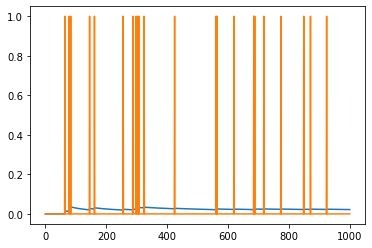

In [65]:
# Frozen lake 게임의 World(Environment) 불러오기
# 여기서 World란, 위 예시의 R array처럼 각 state와 각 action에 대한 보상이 정해져 있는 Environment를 뜻함
env = gym.make('FrozenLake-v0')

# World의 사이즈와 동일한 Q-table 생성(행:state, 열:action)
Q = np.zeros((env.observation_space.n, env.action_space.n))

# num of episodes : 몇 번 최적의 길을 찾도록 시도할 것인지
num_episodes = 1000
# 각 episode에 대한 reward 담을 리스트 생성
rList = []
successRate = []

### 최대 보상을 갖는 action 반환하는 함수 ###
def rargmax(vector):
    # 최대 보상값
    m = np.amax(vector)
    # nonzero는 vector에서 보상 최대값(m)을 갖는 인덱스를 반환함!
    # 또한 nonzero가 return하는 값은 (array, ) 로 tuple형태로 return함! 그래서 array만 가져오려면 인덱스 붙여줘야 함
    indices = np.nonzero(vector == m)[0]
    # 동일한 보상 값이 여러개 있을 수 있으니까 랜덤으로 하나 선택!
    return random.choice(indices)

for i in range(num_episodes):
    state = env.reset()
    total_reward = 0
    done = False
    
    while not done:
        action = rargmax(Q[state, :])
        new_state, reward, done, _ = env.step(action)
        # 공식 Q(s,a) = reward + discount_factor*max(Q(s',a')) 사용!
        Q[state, action] = reward + np.max(Q[new_state, :])
        
        total_reward += reward
        state = new_state
    
    rList.append(total_reward)
    successRate.append(sum(rList)/(i+1))

print("Final Q-table")
print(Q)
print("Success Rate: ", successRate[-1])
plt.plot(range(len(successRate)), successRate)
plt.plot(range(len(rList)), rList)

## E-greedy + discount factor 적용
- 완전 랜덤하게 다른 길을 탐색 for Exploration

Final Q-table
[[0.00517954 0.00494559 0.00494559 0.0054951 ]
 [0.00494559 0.00582046 0.23302838 0.0054951 ]
 [0.31965484 0.2089496  0.00721511 0.00678407]
 [0.00753786 0.28768935 0.00721511 0.00720131]
 [0.00639449 0.00517954 0.00535601 0.00535601]
 [0.00523842 0.00517954 0.00575504 0.25892042]
 [0.0054951  0.00907045 0.01097594 0.00789444]
 [0.00583306 0.00889051 0.00535601 0.00789444]
 [0.00639449 0.00595112 0.00610567 0.00639449]
 [0.00907045 0.4368617  0.00721511 0.00648118]
 [0.01833923 0.01355054 0.01833923 0.01148889]
 [0.00535601 0.         0.01104499 0.        ]
 [0.00595112 0.         0.00639449 0.00517954]
 [0.01197252 0.01833923 0.90994049 0.01097594]
 [0.02515669 0.82203237 1.00974622 0.02515669]
 [0.         0.00710499 0.00987834 0.00648118]]
Succes rate:  0.021


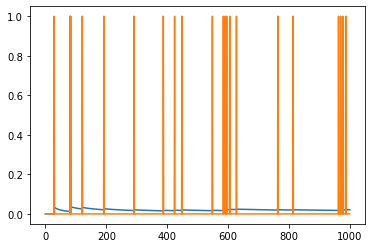

In [81]:
env = gym.make('FrozenLake-v0')
# np.zeros((shape)) = np.zeros([shape])
Q = np.zeros([env.observation_space.n, env.action_space.n])
num_episodes = 1000
rList = []
successRate = []

e = 0.1 # for Exploration(최적의 길이라고 '생각'하는 곳 말고 다른 곳도 가보기 위해!)
discount = 0.9 # discount factor

def rargmax(vector):
    m = np.amax(vector)
    # 0이 아닌 값들 중 m값과 동일한 값의 인덱스 리스트를 반환!
    indices = np.nonzero(vector == m)[0]
    return random.choice(indices)

for episode in range(num_episodes):
    env.reset()
    total_reward = 0
    done = False
    
    while not done:
        rand = random.random()
        if rand < e:
            # 최적의 길 말고 완전 다른 루트 시도해보기
            action = env.action_space.sample()
        else:
            # 최적의 길 찾기 위해 시도
            action = rargmax(Q[state,:])
        
        next_state, reward, done, _ = env.step(action)
        # Q-table에 정보 입력!
        Q[state, action] = reward + discount*np.max(Q[next_state, :])
        # 1번의 길을 찾아다니면서 보상 합산
        total_reward += reward
        # 다음 state로 업데이트
        state = next_state
    rList.append(total_reward)
    successRate.append(sum(rList)/(episode+1))

print("Final Q-table")
print(Q)
print("Succes rate: ", successRate[-1])
plt.plot(range(len(successRate)), successRate)
plt.plot(range(len(rList)), rList)
plt.show()

## Decaying E-greedy + discount factor 적용
- 초반엔 완전 무작위로 다른 길 찾아보고 후반엔 최적의 길을 찾아가는 것으로 학습

Final Q-table
[[0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.81    0.     ]
 [0.59049 0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]]
마지막 시도 Succes Rate:  0.015


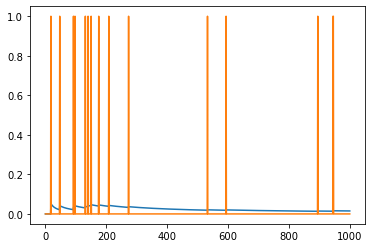

In [6]:
env = gym.make("FrozenLake-v0")
Q = np.zeros([env.observation_space.n, env.action_space.n])

num_episodes = 1000
rList = []
successRate = []
e = 0.1 # for exploration
discount = 0.9 # discount factor

def rargmax(vector):
    m = np.amax(vector)
    indices = np.nonzero(vector == m)[0]
    return random.choice(indices)

for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0
    done = False
    
    while not done:
        rand = random.random()
        # Decaying E-greedy 
        if rand < e/(episode+1):
            action = env.action_space.sample()
        else:
            action = rargmax(Q[state, :])
        
        # 행동을 취함으로써 다음 state로 이동하자!
        next_state, reward, done, _ = env.step(action)
        # Q-table에 정보 업데이트!(공식 이용)
        Q[state, action] = reward + discount*np.max(Q[next_state, :])
        
        # 보상 합계
        total_reward += reward
        # 다음상태로 업데이트
        state = next_state
    rList.append(total_reward)
    successRate.append(sum(rList)/(episode+1))
    
print("Final Q-table")
print(Q)
print("마지막 시도 Succes Rate: ", successRate[-1])
plt.plot(range(len(successRate)), successRate)
plt.plot(range(len(rList)), rList)
plt.show()
        

## learning_rate(Q의 정보는 조금만 참고!) + discount factor + decaying E-greedy

- ``Q(s, a) = (1- α) * Q(s, a) + α * (reward + discount * max(Q(s',a'))``

Final Q table
[[0.00000000e+00 9.96126959e-08 4.67479711e-04 0.00000000e+00]
 [1.07643345e-07 0.00000000e+00 9.95774749e-08 1.84779557e-04]
 [0.00000000e+00 3.12782210e-05 0.00000000e+00 1.45467367e-08]
 [4.07616656e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.09554973e-04 8.67098276e-09 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.08028894e-06 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.49708113e-04 4.21410767e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.62850825e-05]
 [0.00000000e+00 0.00000000e+00 1.91047879e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.76000000e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.82790545e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.0000000

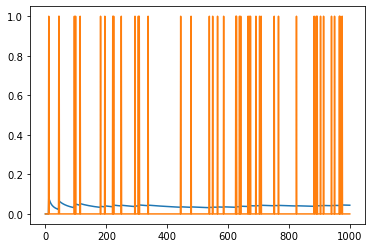

In [7]:
env = gym.make("FrozenLake-v0")
Q = np.zeros((env.observation_space.n, env.action_space.n))

num_episodes = 1000
rList = []
successRate = []
e = 0.1 # E-greedy
discount = 0.9 # discount factor
learning_rate = 0.8 # Q형님 정보 얼마나 참고할지!

def rargmax(vector):
    m = np.amax(vector)
    indices = np.nonzero(vector == m)[0]
    return random.choice(indices)

for episode in range(num_episodes):
    # 초기 상태 리셋
    state = env.reset()
    total_reward = 0
    done = False
    
    while not done:
        rand = random.random()
        if rand < e/(episode+1):
            action = env.action_space.sample()
        else:
            # 그렇지 않으면 보상을 최대로 하는 action을 선택!
            action = rargmax(Q[state, :])
        
        # 다음 state로 행동을 옮기자!
        next_state, reward, done, _ = env.step(action)
        # Q-table 정보 업데이트!
        Q[state, action] = (1-learning_rate)*Q[state, action] + learning_rate*(reward + discount*np.max(Q[next_state, :]))
        total_reward += reward
        # 그리고 다음상태 업데이트!
        state = next_state
        
    rList.append(total_reward)
    successRate.append(sum(rList)/(episode+1))

print("Final Q table")
print(Q)
print("Success Rate: ", successRate[-1])
plt.plot(range(len(successRate)), successRate)
plt.plot(range(len(rList)), rList)
plt.show()
    
        

## learning_rate + discount factor + Decaying add random noise

Final Q-table
[[2.88001133e-02 2.56434456e-03 8.91610045e-04 2.13770763e-03]
 [6.54755715e-04 3.40849304e-05 9.05646778e-05 2.74711873e-02]
 [2.80477601e-02 0.00000000e+00 1.09090173e-03 1.32022295e-03]
 [8.96291161e-05 0.00000000e+00 1.49521395e-04 1.03834302e-03]
 [8.82858197e-02 3.18290996e-03 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.38384252e-02 1.14784021e-06 1.59996257e-05 6.03399521e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.04433017e-03 0.00000000e+00 9.22177331e-02]
 [0.00000000e+00 1.70522856e-01 0.00000000e+00 1.59184634e-03]
 [7.22845956e-01 1.38561879e-04 3.80012286e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.13734490e-01 0.00000000e+00]
 [0.00000000e+00 9.46099992e-01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.0000000

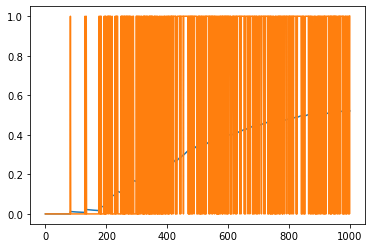

In [10]:
env = gym.make("FrozenLake-v0")
Q = np.zeros((env.observation_space.n, env.action_space.n))

num_episodes = 1000
rList = []
successRate = []
discount = 0.9 # discount factor
learning_rate # Q형님의 정보를 얼마나 참고할지!

def rargmax(vector):
    m = np.max(vector)
    indices = np.nonzero(vector == m)[0]
    return random.choice(indices)

for episode in range(num_episodes):
    # 초기 상태 설정
    state = env.reset()
    total_reward = 0
    done = False
    
    while not done:
        # Decaying하게 Random noise값을 더해주어서 최적의 길이라고 생각하는 위주의 길들(보상이 큰 상위의 상태로 가는 행동들 위주로!)로 선택
        action = rargmax(Q[state, :] + np.random.random(env.action_space.n)/(episode+1))
        next_state, reward, done, _ = env.step(action)
        
        # Q-table 정보 업데이트
        Q[state, action] = (1-learning_rate)*Q[state, action] + learning_rate*(reward + discount*np.max(Q[next_state, :]))
        # 선택한 길의 보상 합산
        total_reward += reward
        # 다음상태로 업데이트
        state = next_state
    rList.append(total_reward)
    successRate.append(sum(rList)/(episode+1))

print("Final Q-table")
print(Q)
print("Success Rate: ", successRate[-1])
plt.plot(range(len(successRate)), successRate)
plt.plot(range(len(rList)), rList)
plt.show()

## Deterministic 한 문제로 바꾸면!?

- 그동안 한 것은 '미끄러질 수 있는' 즉, ``제3의 변수가 개입되어`` 원하는 결과로 못갈 수 있는 ``Stochastic``

Final Q table
[[0.      0.59049 0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.6561  0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.41472 0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.729   0.     ]
 [0.      0.81    0.      0.     ]
 [0.      0.82944 0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.9     0.     ]
 [0.      0.      1.      0.     ]
 [0.      0.      0.      0.     ]]
Success Rate:  0.952


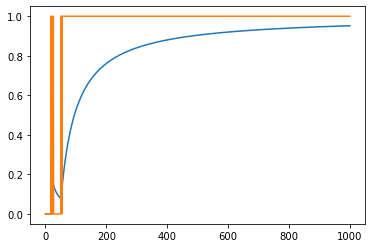

In [21]:
env = gym.make("FrozenLake-v0", is_slippery=False)
Q = np.zeros((env.observation_space.n, env.action_space.n))

num_episodes = 1000
rList = []
successRate = []
discount = 0.9 # discount factor
learning_rate = 0.8 # Q의 정보를 얼마나 참고할 것인지!

def rargmax(vector):
    m = np.amax(vector)
    indices = np.nonzero(vector == m)[0]
    return random.choice(indices)

for episode in range(num_episodes):
    # 초기 상태설정
    state = env.reset()
    # 합산할 reward 설정
    total_reward = 0
    done = False
    
    while not done:
        action = rargmax(Q[state, :] + np.random.random(env.action_space.n)/(episode+1))
        # 행동을 취함으로써 다음 state로 넘어가고 얻는 보상 return
        next_state, reward, done, _ = env.step(action)
        # Q-table 정보 업데이트
        Q[state, action] = (1-learning_rate)*Q[state, action] + learning_rate*(reward + discount*np.max(Q[next_state, :]))
        
        # state가 옮겨지면서 얻는 정보 합산
        total_reward += reward
        # 상태 업데이트
        state = next_state
        
    rList.append(total_reward)
    successRate.append(sum(rList)/(episode+1))

print("Final Q table")
print(Q)
print("Success Rate: ", successRate[-1])
plt.plot(range(len(successRate)), successRate)
plt.plot(range(len(rList)), rList)
plt.show()